In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
amazon=pd.read_csv("ratings_Electronics.csv")

In [3]:
amazon.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [4]:
amazon.shape

(7824481, 4)

In [5]:
amazon.columns=['userid','productid', 'ratings', 'timestamp']

In [6]:
amazon.head()

,userid,productid,ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [7]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
userid       object
productid    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [8]:
amazon.dtypes

userid        object
productid     object
ratings      float64
timestamp      int64
dtype: object

In [9]:
amazon.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,7824481.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824481.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


C:\Users\panka\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


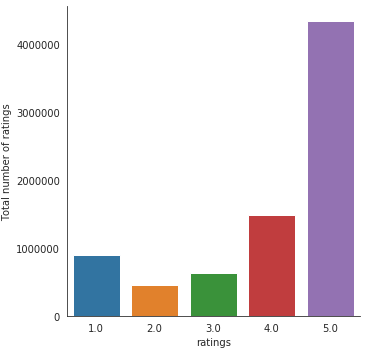

In [10]:
with sns.axes_style('white'):
    g = sns.factorplot("ratings", data=amazon, aspect=1.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [11]:
print("Total data ")
print("\nTotal no of ratings :",amazon.shape[0])
print("Total No of Users   :", len(np.unique(amazon.userid)))
print("Total No of products  :", len(np.unique(amazon.productid)))

Total data 

Total no of ratings : 7824481
Total No of Users   : 4201696
Total No of products  : 476001


In [12]:
amazon['ratings'].value_counts()

5.0    4347540
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: ratings, dtype: int64

In [13]:
amazon.isnull().any()

userid       False
productid    False
ratings      False
timestamp    False
dtype: bool

In [14]:
amazon.drop('timestamp', axis=1, inplace=True)

In [15]:
amazon.head()

,userid,productid,ratings
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [16]:
amazon['userid'].value_counts().head()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: userid, dtype: int64

In [17]:
count=amazon.groupby('userid', as_index=False).count()
count.head(20)

,userid,productid,ratings
0,A00000262KYZUE4J55XGL,1,1
1,A000063614T1OE0BUSKUT,2,2
2,A00009182QVLSWIGHLS1B,1,1
3,A00009661LC9LQPGKJ24G,1,1
4,A00010809P09NUU6ZP6H,1,1
5,A00014061C2IZNE0YEILY,1,1
6,A000145014WOTZJ5NSKOR,1,1
7,A00015222LZ55IJSVL5IX,1,1
8,A00015228CUPGPF957DS,1,1
9,A0001528BGUBOEVR6T5U,4,4


In [18]:
df1=pd.merge(amazon,count,how='right',on=['userid'])

In [19]:
df1.head()

,userid,productid_x,ratings_x,productid_y,ratings_y
0,A2CX7LUOHB2NDG,0321732944,5.0,4,4
1,A2CX7LUOHB2NDG,B000W3LJ6Y,5.0,4,4
2,A2CX7LUOHB2NDG,B001EYU79A,5.0,4,4
3,A2CX7LUOHB2NDG,B0089MVZDW,4.0,4,4
4,A2NWSAGRHCP8N5,0439886341,1.0,1,1


In [20]:
df1['count']=df1['productid_y']
df1['productid']=df1['productid_x']
df1['ratings']=df1['ratings_x']

In [21]:
df1=df1[['userid', 'productid', 'ratings', 'count']]

In [22]:
df1.head()

,userid,productid,ratings,count
0,A2CX7LUOHB2NDG,0321732944,5.0,4
1,A2CX7LUOHB2NDG,B000W3LJ6Y,5.0,4
2,A2CX7LUOHB2NDG,B001EYU79A,5.0,4
3,A2CX7LUOHB2NDG,B0089MVZDW,4.0,4
4,A2NWSAGRHCP8N5,0439886341,1.0,1


In [23]:
df1=df1.sort_values(by=['count'], ascending=True)
electronics_data=df1[df1['count']>=50]

In [24]:
electronics_data.nunique()

userid        1540
productid    48190
ratings          5
count          166
dtype: int64

In [25]:
electronics_data.head()

,userid,productid,ratings,count
286647,A11R5VW7IM6ISQ,B0017XMN7C,5.0,50
286644,A11R5VW7IM6ISQ,B000I4T7VG,4.0,50
860697,A2RS66Y79Q8X0W,B000AJIF4E,5.0,50
860698,A2RS66Y79Q8X0W,B000CNAEEW,5.0,50
860699,A2RS66Y79Q8X0W,B000EDQPYI,1.0,50


# Analysing the rating

In [26]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = electronics_data.groupby(by='userid')['ratings'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

userid
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: ratings, dtype: int64

In [27]:
amazon_mean_count =pd.DataFrame(electronics_data.groupby('productid')['ratings'].mean())

In [28]:
amazon_mean_count['rating_counts']= electronics_data.groupby('productid')['ratings'].count().sort_values(ascending=False)

In [29]:
amazon_mean_count.head()

,ratings,rating_counts
productid,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


# Popularity Based Recommendation

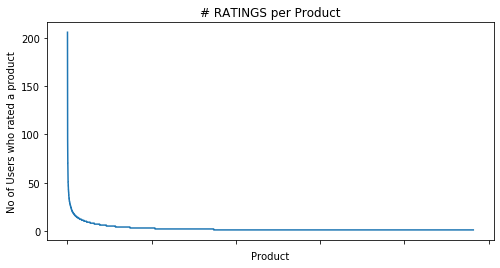

In [30]:
no_of_ratings_per_product = electronics_data.groupby(by='productid')['ratings'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of Users who rated a product')
ax.set_xticklabels([])

plt.show()

In [31]:
#Average rating of the product 

electronics_data.groupby('productid')['ratings'].mean().head()

productid
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
Name: ratings, dtype: float64

In [32]:
electronics_data.groupby('productid')['ratings'].mean().sort_values(ascending=False).head()


productid
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: ratings, dtype: float64

In [33]:
#Total no of rating for product

electronics_data.groupby('productid')['ratings'].count().sort_values(ascending=False).head()

productid
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: ratings, dtype: int64

In [34]:
ratings_mean_count = pd.DataFrame(electronics_data.groupby('productid')['ratings'].mean())

In [35]:
ratings_mean_count['rating_counts'] = pd.DataFrame(electronics_data.groupby('productid')['ratings'].count())

In [36]:
ratings_mean_count.head()

,ratings,rating_counts
productid,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


In [37]:
ratings_mean_count['rating_counts'].max()

206

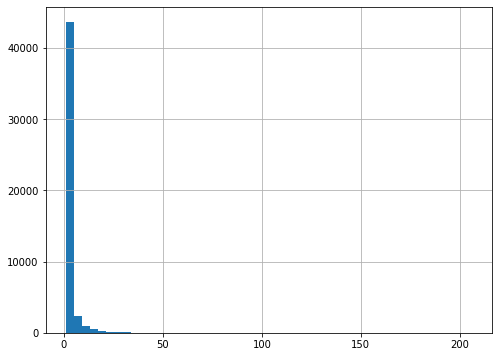

In [38]:
plt.figure(figsize=(8,6))
ratings_mean_count['rating_counts'].hist(bins=50)

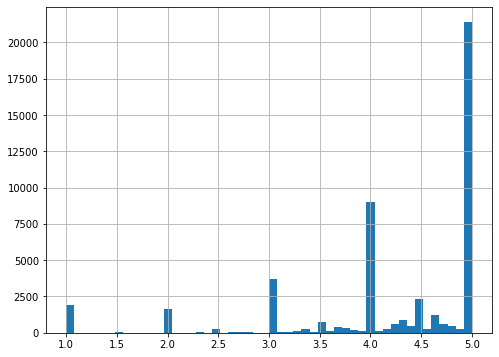

In [39]:
plt.figure(figsize=(8,6))
ratings_mean_count['ratings'].hist(bins=50)

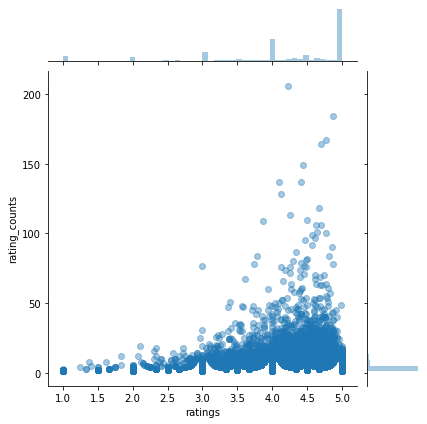

In [40]:
sns.jointplot(x='ratings', y='rating_counts', data=ratings_mean_count, alpha=0.4)

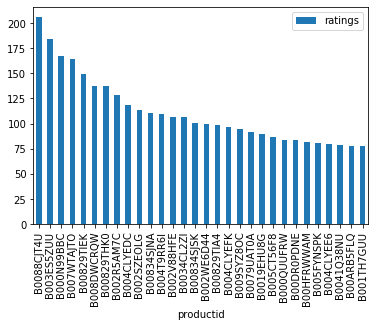

In [41]:
popular_products = pd.DataFrame(electronics_data.groupby('productid')['ratings'].count())
most_popular = popular_products.sort_values('ratings', ascending=False)
most_popular.head(30).plot(kind = "bar")

From above analysis we have catagorized top 30 products that can be referred to any new user in case of cold-start based on the popularity of the product.

# Collaberative filtering (Item-Item recommedation)

In [42]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [43]:
#Reading the dataset
electronics_data1=electronics_data.drop('count', axis=1)
new_df=electronics_data1.groupby('productid').filter(lambda x:x['ratings'].count() >=50)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)
new_df.head(20)

,userid,productid,ratings
286677,A11R5VW7IM6ISQ,B007WTAJTO,5.0
875616,A2AFTRU43PY9P5,B005CLPP84,5.0
875599,A2AFTRU43PY9P5,B0015DYMVO,5.0
329081,A16RL0RMRF974O,B007WTAJTO,5.0
875602,A2AFTRU43PY9P5,B001TH7GSW,5.0
766641,A20ZM879PCQQEZ,B0019EHU8G,1.0
766657,A20ZM879PCQQEZ,B005HMKKH4,1.0
766634,A20ZM879PCQQEZ,B000Q8UAWY,5.0
286652,A11R5VW7IM6ISQ,B001TH7GUU,5.0
329045,A16RL0RMRF974O,B00004ZCJE,5.0


In [44]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [45]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [46]:
test_pred = algo.test(testset)

In [47]:
test_pred

[Prediction(uid='A1AWL9JASMG904', iid='B0088CJT4U', r_ui=3.0, est=4.4180609672243865, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3EFSLEMHNPP6A', iid='B004T9RR6I', r_ui=5.0, est=3.9037789774531597, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A3GQY0TFRG0MPZ', iid='B001XURP7W', r_ui=5.0, est=4.320754716981132, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3PCEB9ND82AGE', iid='B003ES5ZUU', r_ui=5.0, est=4.4180609672243865, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3HXGSMCIOZEW8', iid='B000QUUFRW', r_ui=5.0, est=4.4180609672243865, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='AOVTLYTHVDNUX', iid='B009NHWVIA', r_ui=5.0, est=4.736606267156172, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A19UTUEBWKIZFT', iid='B0088CJT4U', r_ui=5.0, est=5, details={'actual_k': 4, 'was_impossib

In [48]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 0.9422


0.9421572311890237

# Model-based collaborative filtering system

In [49]:
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='ratings', index='userid', columns='productid', fill_value=0)
ratings_matrix.head()

productid,B00004ZCJE,B00007E7JU,B0002L5R78,B000BQ7GW8,B000HPV3RW,B000JE7GPY,B000JMJWV2,B000LRMS66,B000N99BBC,B000Q8UAWY,...,B009SYZ8OC,B00AQRUW4Q,B00ARB5FLQ,B00BGGDVOO,B00BOHNYTW,B00BOHNYU6,B00DR0PDNE,B00G4UQ6U8,B00HFRWWAM,B00JP12170
userid,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0,0,0,0,0,0,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0
A100WO06OQR8BQ,0,0,1,0,5,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0
A105S56ODHGJEK,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
A105TOJ6LTVMBG,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
A10AFVU66A79Y1,0,0,0,0,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,0


In [50]:
ratings_matrix.shape

(1357, 77)

In [51]:
X= ratings_matrix.T
X.head()

userid,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
productid,,,,,,,,,,,,,,,,,,,,,
B00004ZCJE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00007E7JU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B0002L5R78,0,1,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,5
B000BQ7GW8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,5,0,0
B000HPV3RW,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,0


In [52]:
X.shape

(77, 1357)

In [53]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(77, 10)

In [54]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(77, 77)

In [55]:
X.index[75]

'B00HFRWWAM'

In [56]:
i = "B00HFRWWAM"
product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

In [57]:
#Correlation for all items with the item purchased by this customer based on items rated 
#by other customers people who bought the same product
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID

array([0.39263547, 0.55661363, 0.54902072, 0.11158013, 0.32340788,
       0.46771417, 0.38279822, 0.34068055, 0.38188113, 0.24268003,
       0.1427892 , 0.12629287, 0.51933147, 0.25030419, 0.8016432 ,
       0.21786376, 0.56281931, 0.08253246, 0.7847857 , 0.10650779,
       0.33810562, 0.7688817 , 0.87104605, 0.2332893 , 0.17232161,
       0.23897574, 0.19774505, 0.48450253, 0.25152083, 0.48301979,
       0.6768702 , 0.11774404, 0.65219099, 0.58691631, 0.66156095,
       0.60813487, 0.84695864, 0.64625808, 0.58612756, 0.90503398,
       0.52890481, 0.03543094, 0.08155825, 0.15905838, 0.18199144,
       0.5154624 , 0.78735897, 0.6556851 , 0.21224551, 0.3527797 ,
       0.45740741, 0.06179534, 0.85510412, 0.70669491, 0.57984918,
       0.66570426, 0.80584198, 0.25154979, 0.42783578, 0.4819476 ,
       0.65122273, 0.27749086, 0.66511297, 0.68843258, 0.65698032,
       0.81019524, 0.6258707 , 0.62514802, 0.88107298, 0.93743467,
       0.20506315, 0.58790643, 0.85748962, 0.19247213, 0.23829

In [58]:
#Recommending top 5 highly correlated products in sequence
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:5]

['B001CHHVCU', 'B001TOD7ME', 'B002R5AM7C', 'B002SQK2F2', 'B003M0NURK']

Here are the top 5 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

In [ ]:
# COLL